In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from tensorflow import keras # type: ignore
from tensorflow.keras import layers # type: ignore
import tensorflow as tf # type: ignore
# from kerastuner.tuners import RandomSearch
from scipy.signal import savgol_filter
from mlxtend.evaluate import confusion_matrix # type: ignore
import random

In [36]:
data = pd.read_csv("/home/sonn/Son/Workspace/UV-Vis_IR_NuocCam/data/data_tunhien.csv")
data.head()

,TenMau,DiaPhuong,NamLayMau,Giong,648.5568,652.2841,656.0115,659.7388,663.4661,667.1935,...,245,240,235,230,225,220,215,210,205,200
0,BG.23.Vinh.01,Bắc Giang,2023,Vinh,0.288038,0.314208,0.312564,0.283867,0.275794,0.293704,...,2.369,2.630,2.855,2.885,2.676,2.370,2.081,1.853,1.699,1.620
1,BG.23.Vinh.02,Bắc Giang,2023,Vinh,0.334148,0.326995,0.323069,0.320567,0.320840,0.319613,...,2.578,2.808,3.041,3.136,3.004,2.738,2.461,2.236,2.085,2.012
2,BG.23.Vinh.04,Bắc Giang,2023,Vinh,0.283841,0.278747,0.278234,0.276258,0.274365,0.272161,...,5.167,20.000,20.000,5.079,3.885,3.273,2.884,2.630,2.475,2.401
3,BG.23.Vinh.05,Bắc Giang,2023,Vinh,0.193778,0.195921,0.196467,0.195541,0.198358,0.194969,...,3.279,3.597,3.823,3.735,3.400,3.032,2.725,2.496,2.345,2.271
4,BG.23.Vinh.07,Bắc Giang,2023,Vinh,0.225972,0.224173,0.225184,0.221635,0.219974,0.218776,...,3.111,3.447,3.759,3.750,3.401,2.991,2.649,2.400,2.240,2.164


In [37]:
X = data.iloc[:,4:]
X.head()

,648.5568,652.2841,656.0115,659.7388,663.4661,667.1935,670.9208,674.6481,678.3755,682.1028,...,245,240,235,230,225,220,215,210,205,200
0,0.288038,0.314208,0.312564,0.283867,0.275794,0.293704,0.297450,0.278578,0.271924,0.281354,...,2.369,2.630,2.855,2.885,2.676,2.370,2.081,1.853,1.699,1.620
1,0.334148,0.326995,0.323069,0.320567,0.320840,0.319613,0.316539,0.312681,0.312266,0.307793,...,2.578,2.808,3.041,3.136,3.004,2.738,2.461,2.236,2.085,2.012
2,0.283841,0.278747,0.278234,0.276258,0.274365,0.272161,0.269835,0.266996,0.265478,0.261862,...,5.167,20.000,20.000,5.079,3.885,3.273,2.884,2.630,2.475,2.401
3,0.193778,0.195921,0.196467,0.195541,0.198358,0.194969,0.194062,0.193205,0.193799,0.194423,...,3.279,3.597,3.823,3.735,3.400,3.032,2.725,2.496,2.345,2.271
4,0.225972,0.224173,0.225184,0.221635,0.219974,0.218776,0.218363,0.217704,0.216161,0.214019,...,3.111,3.447,3.759,3.750,3.401,2.991,2.649,2.400,2.240,2.164


In [38]:
tenmau = data["TenMau"]

In [39]:
ma = []
for mau in tenmau:
    ma.append(mau.replace("/", "")[0:2])

In [40]:
data["DiaPhuong"] = ma

In [41]:
y = data['DiaPhuong']

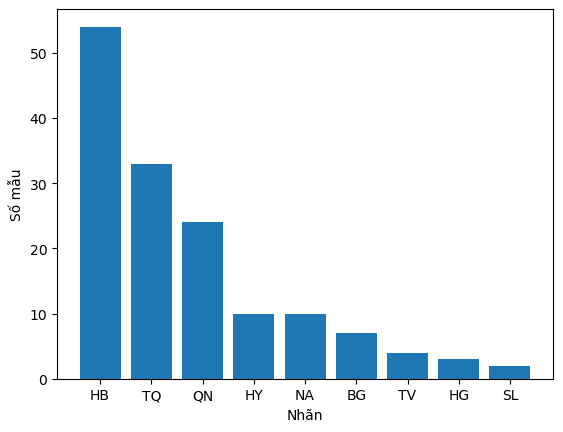

In [42]:
label_counts = y.value_counts()

# Plotting
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Nhãn')
plt.ylabel('Số mẫu')
plt.show()

In [43]:
labels = np.unique(y)
le = LabelEncoder()
y = le.fit_transform(y)

In [44]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8])

In [54]:
onehot = OneHotEncoder(sparse_output=False)
# y_train = onehot.fit_transform(y_train.reshape(-1,1))
# y_test = onehot.fit_transform(y_test.reshape(-1,1))
y = onehot.fit_transform(y.reshape(-1,1))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117, 1061), (30, 1061), (117, 9), (30, 9))

In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [59]:
y_train.shape[1]

9

In [60]:
y_test.shape[1]

9

In [64]:
tf.random.set_seed(1)
random.seed(1)
np.random.seed(1)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.Conv1D(filters=24, kernel_size=3))

model.add(tf.keras.layers.Conv1D(filters=24, kernel_size=3))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))


model.add(tf.keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(optimizer="Adam", loss = 'CategoricalCrossentropy', metrics = ['accuracy'])
history=model.fit(X_train, y_train, batch_size=8, epochs=150, validation_data=(X_test, y_test))


Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4117 - loss: 2.2673 - val_accuracy: 0.4667 - val_loss: 1.3465
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5641 - loss: 1.2996 - val_accuracy: 0.5333 - val_loss: 1.3054
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6377 - loss: 0.9205 - val_accuracy: 0.7000 - val_loss: 1.0005
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7026 - loss: 0.7884 - val_accuracy: 0.6667 - val_loss: 0.9911
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7127 - loss: 0.6737 - val_accuracy: 0.7333 - val_loss: 0.9052
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7534 - loss: 0.5625 - val_accuracy: 0.7667 - val_loss: 0.9002
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8306 - loss: 0.5063 - val_accuracy: 0.7333 - val_loss: 1.0710
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7577 - loss: 0.5824 - val_accuracy: 0.7333

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


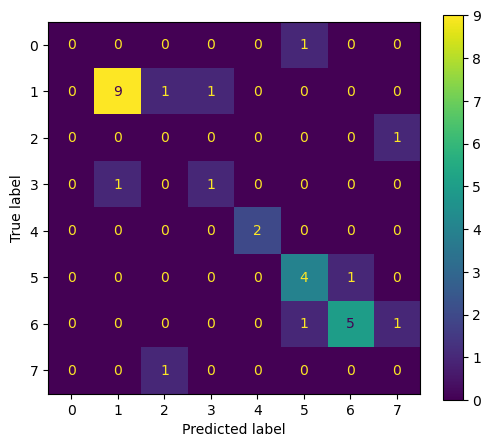

In [65]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_m = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_m, y_pred)
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)
plt.show()

In [66]:
print(accuracy_score(y_test_m, y_pred))

0.7
